In [69]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [70]:
k_arr = [1, 2, 3, 4, 5]
w_arr = [0, 1, 2, 1, 0]
u_allowable = [0, 1, 2]
h_allowable = [8, 7, 6, 5, 4, 3]
hf_allowable = [8, 7, 6]
N = len(k_arr)

In [72]:
surf_x = []
surf_y = []
u_surf_z = []
J_surf_z = []

for k in reversed(range(N)):
    benefits = {}
    w = w_arr[k]
    for h in h_allowable:
        J_max = -np.inf
        for u in u_allowable:
            h_next = h + w - u
            if k == 4:
                # First iteration
                if h_next in hf_allowable:
                    J = 0.1 * h * u - 0.5 * (h_next - 8) ** 2
                    if J > J_max:
                        # If J is maximized for current state
                        u_optimal = u
                        J_max = J
                        benefits.update({h: J_max})

                        surf_x.append(k)
                        surf_y.append(h)
                        u_surf_z.append(u)
                        J_surf_z.append(J_max)
                        
            else:
                # Not first iteration
                if h_next in h_allowable:
                    if h_next in benefits_next:
                        J = 0.1 * h * u + benefits_next[h_next]
                        if J > J_max:
                            # If J is maximized for current state
                            u_optimal = u
                            J_max = J
                            benefits.update({h: J_max})

                            surf_x.append(k)
                            surf_y.append(h)
                            u_surf_z.append(u)
                            J_surf_z.append(J_max)
    benefits_next = benefits

Text(0.5, 0, 'Control u')

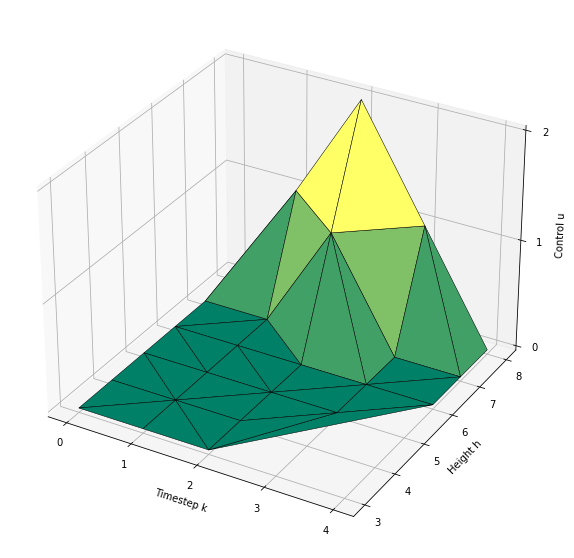

In [114]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# ax.view_init(elev=90, azim=-90)

surf = ax.plot_trisurf(surf_x, surf_y, u_surf_z, linewidth=0.5, cmap="summer", edgecolor="black")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Timestep k")
ax.set_ylabel("Height h")
ax.set_zlabel("Control u")

Text(0.5, 0, 'Cost J')

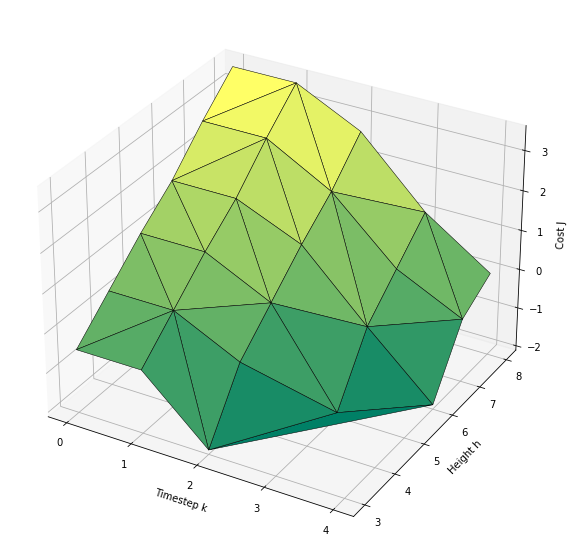

In [113]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# ax.view_init(elev=90, azim=-90)

surf = ax.plot_trisurf(surf_x, surf_y, J_surf_z, linewidth=0.5, cmap="summer", edgecolor="black")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Timestep k")
ax.set_ylabel("Height h")
ax.set_zlabel("Cost J")